In [5]:
def error_absoluto(valor_real, valor_cifras_significativas):
    #| real - punto flotante|
    return np.absolute((valor_real-valor_cifras_significativas))

In [6]:
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    y=((x**3.0)/3.0)+((x**2.0)/2.0)+(2.0*x)+(17/6)
    return y


def f_prima(x):
    y=(x**2.0)+x+2.0
    return y

def f_prima_prima(x):
    y=(2.0*x)+1.0
    return y


In [7]:
def N_R_mejorado(P0):
    pn=P0
    pn_sig= pn - (f(pn)*f_prima(pn))/ ( f_prima(pn)**2  - f(pn)*f_prima_prima(pn))
    iteraciones=0
    while (1):
        #print(pn,pn -  (f(pn)*f_prima(pn))/ ( f_prima(pn)**2  - f(pn)*f_prima_prima(pn)) )
        pn=pn_sig
        pn_sig=pn - (f(pn)*f_prima(pn))/ ( f_prima(pn)**2  - f(pn)*f_prima_prima(pn))
        error = error_absoluto(pn,pn_sig)
        #print(error)
        iteraciones=iteraciones+1
        if(error <= 0.000001):
        	break
    print("iteraciones: ", iteraciones)
    print("pn", pn)
    return pn, iteraciones


In [8]:
PS0=5
PS1=3

print("NR mejorado") 
N_R_mejorado(PS0)

NR mejorado
iteraciones:  5
pn -1.4380260626422607


(-1.4380260626422607, 5)

In [9]:
def Newton_raphson(P_sub_0):
    P_sub_n=P_sub_0
    p_sig = P_sub_n- (1/f_prima(P_sub_n) )*f(P_sub_n)
    iteraciones = 0
    while(1):
    	#print(P_sub_n, (P_sub_n- (1/f_prima(P_sub_n) )*f(P_sub_n) ) ,iteraciones)
    	P_sub_n = p_sig
    	p_sig = P_sub_n- (1/f_prima(P_sub_n) )*f(P_sub_n)
    	error = (error_absoluto(P_sub_n,p_sig))
    	iteraciones = iteraciones + 1
    	#print(error)
    	if(error <= 0.000001):
    		break
    print("resultado: ", p_sig,"ite: " ,iteraciones)
    return p_sig, iteraciones

In [10]:
print("NR ") 
Newton_raphson(PS0)

NR 
resultado:  -1.4380261518776314 ite:  6


(-1.4380261518776314, 6)

In [11]:
def steffesen(P0):
    x0=P0
    iteraciones = 0
    x1 = x0 - (x0-f(x0))**2 / (f(f(x0)) - 2*f(x0) + x0)
    #print("\nx0, x1: ",x0, x1)
    while(1):
        #print(x0,  x0 - (x0-f(x0))**2 / (f(f(x0)) - 2*f(x0) + x0))
        x0 = x1
        x1=  x0 - (x0-f(x0))**2 / (f(f(x0)) - 2*f(x0) + x0) 
        iteraciones = iteraciones + 1
        error = error_absoluto(x0,x1)
        if(error <= 0.000001):
        	print("distef")
        	break
        #print("x0,x1: ",x0,x1)
    print("res: ", x1, "ite: ", iteraciones)
    return x1, iteraciones

In [12]:
print("Steffesen")
steffesen(PS0)

Steffesen
distef
res:  -2.0540758850212 ite:  59


(-2.0540758850212, 59)

In [13]:
def Secante(P_sub_0,P_sub_1):
    P_sub_n1=P_sub_0
    P_sub_n2=P_sub_1
    iteraciones=0
    while(1):
        #print(P_sub_n1,P_sub_n2, P_sub_n1- ((P_sub_n2-P_sub_n1)/(f(P_sub_n2)-f(P_sub_n1)))* f(P_sub_n1))
        #print(((f(P_sub_n2)-f(P_sub_n1)))* f(P_sub_n1))
        aux=P_sub_n2
        P_sub_n2=P_sub_n1- ((P_sub_n2-P_sub_n1)/(f(P_sub_n2)-f(P_sub_n1)))* f(P_sub_n1)
        P_sub_n1=aux
        iteraciones = iteraciones + 1
        error = error_absoluto(P_sub_n1,P_sub_n2)
        if(error <= 0.000001):
        	break
        #print(P_sub_n1,"ite: ",iteraciones)
    print("resultado: ", P_sub_n1, "iteraciones: ", iteraciones)
    return P_sub_n1, iteraciones

In [14]:
Secante(PS0,PS1)

resultado:  -1.4380261513314065 iteraciones:  10


(-1.4380261513314065, 10)

In [15]:
def falsa_posicion(a,b):
    an = a
    bn = b
    print(an,bn,f(an), f(bn))
    iteraciones = 0
    while(1):
        P_sub_n = bn - ((f(bn)*(bn - an)) / ( f(bn) -  f(an)))
        #print(an,bn,P_sub_n, f(P_sub_n))
        error = error_absoluto(an, P_sub_n)
        if(error <= 0.000001):
        	break
        if (f(an) * f(P_sub_n) > 0):
            an=P_sub_n
        elif( f(bn) * f(P_sub_n) > 0):
            bn = P_sub_n
        iteraciones = iteraciones + 1
    print("resultado: ", P_sub_n, "iteraciones: ", iteraciones)
    return P_sub_n, iteraciones

In [16]:
falsa_posicion(PS0,PS1)

5 3 66.99999999999999 22.333333333333332
di
resultado:  -1.4380254571638664 iteraciones:  24


(-1.4380254571638664, 24)

In [155]:
def grafico1(a, b, c, d, e):
	nombres = ['NR mejorado', 'Newton_raphson', 'steffesen', 'secante', 'falsa posicion']
	valores = [a, b, c, d, e]
	fig, ax = plt.subplots()
	ax.set_ylabel("valores")
	ax.set_title("valorese obtenidos")
	plt.bar(nombres, valores)
	i = 0
	for a, b in zip(valores, nombres):
		plt.plot(a, label=nombres[i]+': {}'.format(a))
		i = i + 1
	plt.legend()
	plt.show()

In [156]:
def grafico2(a, b, c, d, e):
	nombres = ['NR mejorado', 'Newton_raphson', 'steffesen', 'secante', 'falsa posicion']
	valores = [a, b, c, d, e]
	fig, ax = plt.subplots()
	ax.set_ylabel("iteraciones")
	ax.set_title("numero de iteraciones")
	plt.bar(nombres, valores)
	i = 0
	for a, b in zip(valores, nombres):
		plt.plot(a, label=nombres[i]+': {}'.format(a))
		i = i + 1
	plt.legend()
	plt.show()


iteraciones:  5
pn -1.4380260626422607
resultado:  -1.4380261518776314 ite:  6
distef
res:  -2.0540758850212 ite:  59
resultado:  -1.4380261513314065 iteraciones:  10
5 3 66.99999999999999 22.333333333333332
di
resultado:  -1.4380254571638664 iteraciones:  24


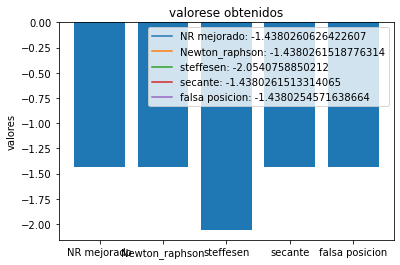

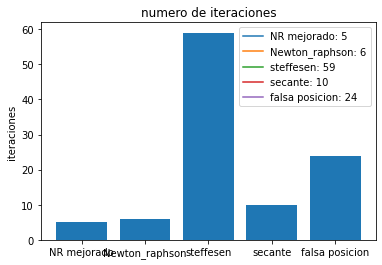

In [157]:
#AL IMPLEMENTAR EL GRAFICO AQUI ESTE SE VE UN POCO PEQUEÑO Y AJUSTADO
nmr, nmi=N_R_mejorado(PS0)
nrr, nri = Newton_raphson(PS0)
sr, si = steffesen(PS0)
scr, sci = Secante(PS0,PS1)
fpr, fpi = falsa_posicion(PS0,PS1)

grafico1(nmr, nrr, sr, scr,fpr)
grafico2(nmi, nri, si, sci,fpi)